In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import OneHotEncoder

In [2]:
data= pd.read_csv("oasis_cross-sectional.csv")
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB
None
(436, 12)


In [3]:
print(data.shape)

(436, 12)


In [4]:
# the last 20 rows contains the test-retest brain MRI data from repeated subjects, so we drop them
data.drop(data.tail(20).index,inplace=True)

In [5]:
# drop unuseful columns. Everyone in the study is right handed. 
# ID and MRI delays are uneccessary information for our study
data.drop(columns=['ID','Delay','Hand'],inplace=True)

In [6]:
print(data.isna().sum())

M/F       0
Age       0
Educ    181
SES     200
MMSE    181
CDR     181
eTIV      0
nWBV      0
ASF       0
dtype: int64


In [7]:
# drop the rows that do not have the target variable 
data.dropna(subset=['CDR'],inplace=True)

In [8]:
# rename M/F to Gender
data.rename(columns={'M/F':'Gender'}, inplace=True)

In [9]:
print(data.shape)

(235, 9)


In [10]:
data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,235.000000,235.000000,216.000000,235.00000,235.000000,235.000000,235.000000,235.000000
mean,72.344681,3.178723,2.490741,27.06383,0.285106,1459.497872,0.749132,1.216511
std,12.091369,1.311510,1.120593,3.69687,0.383405,160.368070,0.047906,0.129427
min,33.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000
25%,66.000000,2.000000,2.000000,26.00000,0.000000,1348.000000,0.713500,1.133500
50%,73.000000,3.000000,2.000000,29.00000,0.000000,1447.000000,0.747000,1.213000
75%,81.000000,4.000000,3.000000,30.00000,0.500000,1548.000000,0.784000,1.302000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.847000,1.563000


In [11]:
data.isna().sum()

Gender     0
Age        0
Educ       0
SES       19
MMSE       0
CDR        0
eTIV       0
nWBV       0
ASF        0
dtype: int64

In [12]:
data['SES'].value_counts()

2.0    65
1.0    50
3.0    49
4.0    49
5.0     3
Name: SES, dtype: int64

In [13]:
# check target varibles counts
print(data['CDR'].value_counts())

0.0    135
0.5     70
1.0     28
2.0      2
Name: CDR, dtype: int64


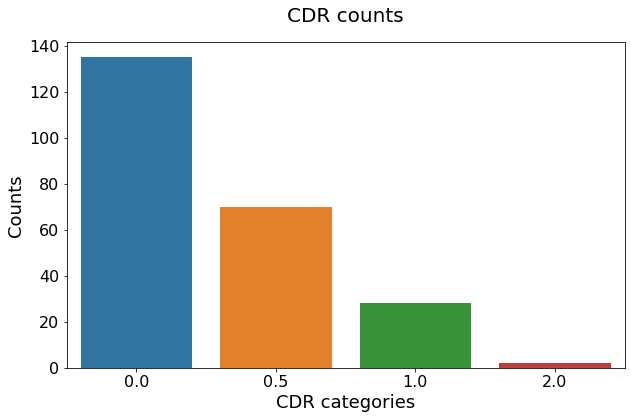

In [14]:
# plot the target variable 
plt.figure(figsize=(10,6))
ax = sns.countplot(x="CDR", data=data)
plt.title('CDR counts', pad =20, size=20)
plt.xlabel('CDR categories', size=18)
plt.xticks(fontsize=16)
plt.ylabel('Counts', size=18)
plt.yticks(fontsize=16)
plt.savefig('CDR_count.png', dpi=300)

In [15]:
# Given that we only have very few people(only 2) in the last class, 
# we will drop that class for our study.
data = data.drop(data[data['CDR']==2].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 415
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  233 non-null    object 
 1   Age     233 non-null    int64  
 2   Educ    233 non-null    float64
 3   SES     214 non-null    float64
 4   MMSE    233 non-null    float64
 5   CDR     233 non-null    float64
 6   eTIV    233 non-null    int64  
 7   nWBV    233 non-null    float64
 8   ASF     233 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 18.2+ KB


In [16]:
# check target varibles counts
print(data['CDR'].value_counts())

0.0    135
0.5     70
1.0     28
Name: CDR, dtype: int64


In [17]:
print(data.shape)

(233, 9)


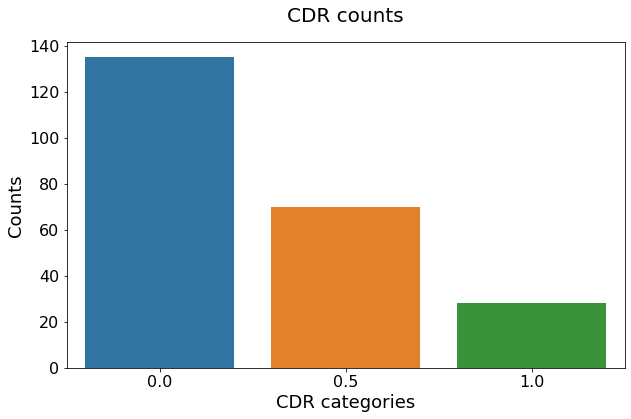

In [18]:
#Plot the target variable after dropping the "2" class
plt.figure(figsize=(10,6))
ax = sns.countplot(x="CDR", data=data)
plt.title('CDR counts', pad =20, size=20)
plt.xlabel('CDR categories', size=18)
plt.xticks(fontsize=16)
plt.ylabel('Counts', size=18)
plt.yticks(fontsize=16)
plt.savefig('CDR_count.png', dpi=300)

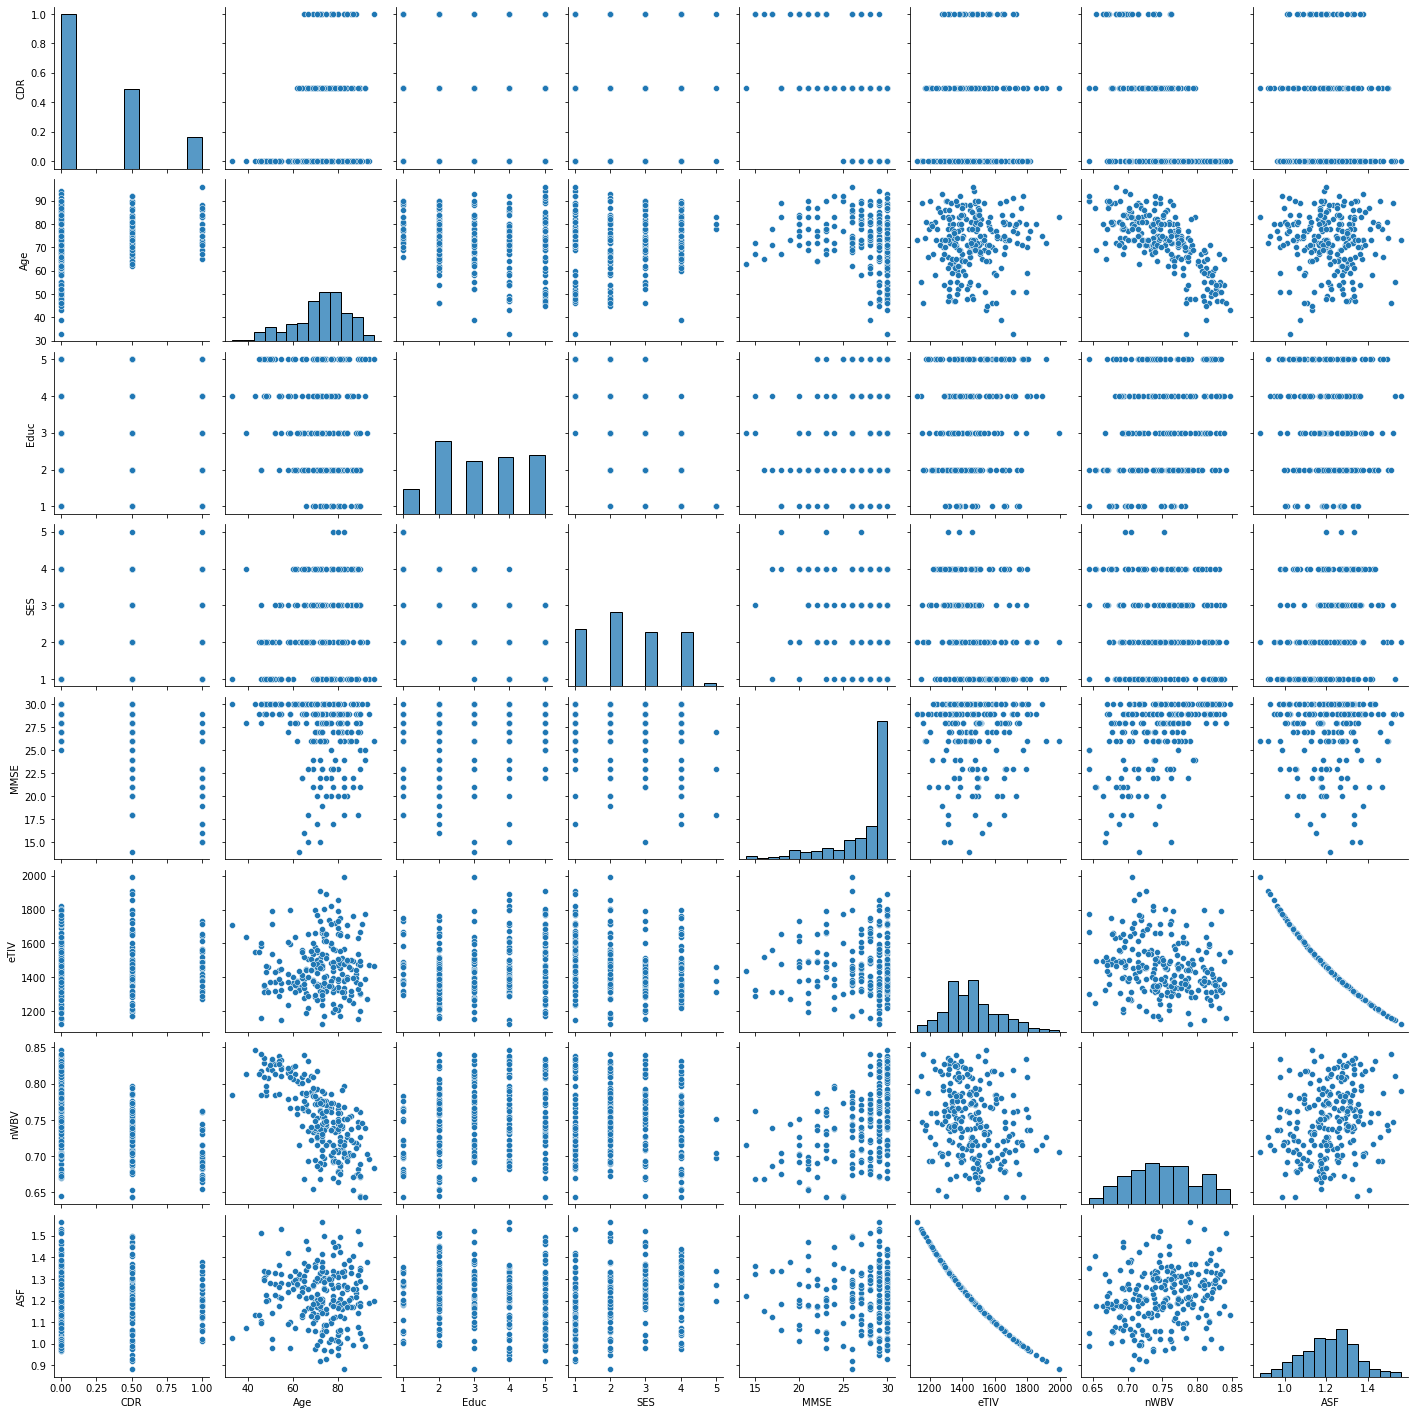

In [19]:
#let's plot a pairplot between each pair of variables
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
cols = ['CDR','Age','Educ', 'SES', 'MMSE','eTIV','nWBV','ASF']
x=data
sns_plot = sns.pairplot(x[cols])

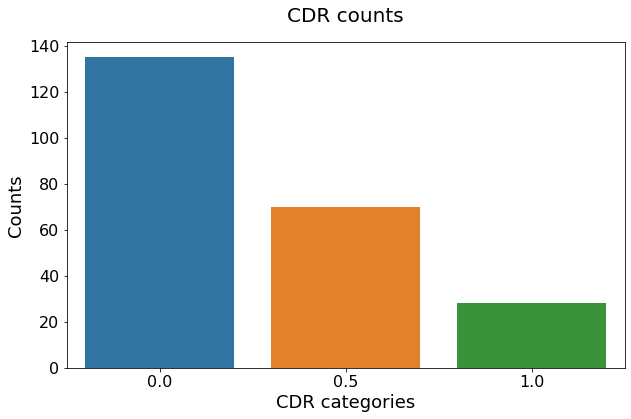

In [20]:
ax = sns.countplot(x="CDR", data=data)
plt.title('CDR counts', pad =20, size=20)
plt.xlabel('CDR categories', size=18)
plt.xticks(fontsize=16)
plt.ylabel('Counts', size=18)
plt.yticks(fontsize=16)
plt.savefig('CDR_count.png', dpi=300)

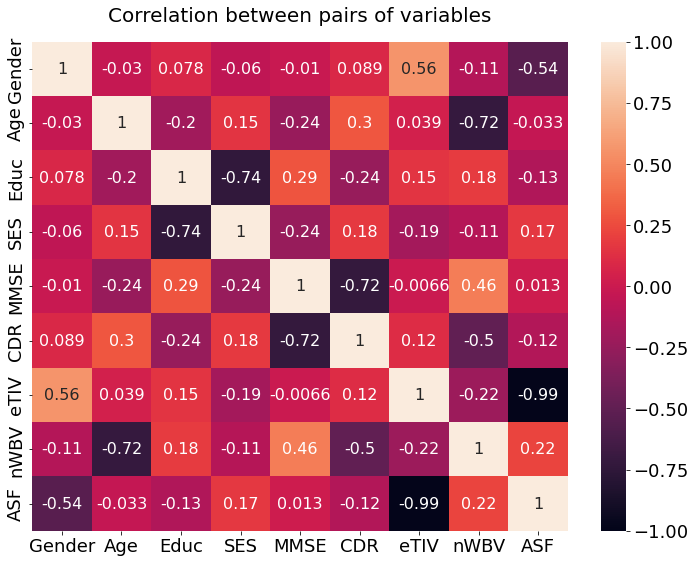

In [151]:
#Plot a heatmap contains correlation values between each pair of variables
corr = data.corr()
plt.figure(figsize=(12,9))
#cmap = sns.diverging_palette(240, 10, as_cmap=True)
#Setting up a diverging palette
#cmap = sns.diverging_palette(0, 250, 150, 50, as_cmap=True)
ax = sns.heatmap(corr,annot=True,annot_kws={"size": 16},vmax=1,vmin=-1)
# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=18)
plt.title('Correlation between pairs of variables',pad =20, size=20)
#plt.xlabel(xlabel,fontsize=18)
plt.xticks(fontsize=18)
#plt.ylabel(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('Heatmap.png', dpi=300)



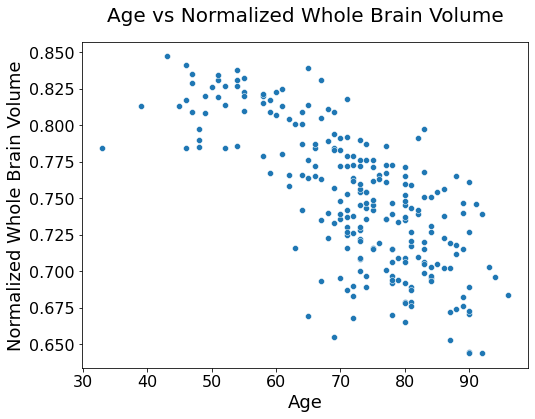

In [22]:
#Plot Age vs Normalized Whole Brain Volume
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='nWBV',data=data)
plt.title('Age vs Normalized Whole Brain Volume',pad=20,size=20)
plt.xlabel('Age', size=18)
plt.xticks(fontsize=16)
plt.ylabel('Normalized Whole Brain Volume',size=18)
plt.yticks(fontsize=16)
plt.savefig('Age_nWBV.png', dpi=300)

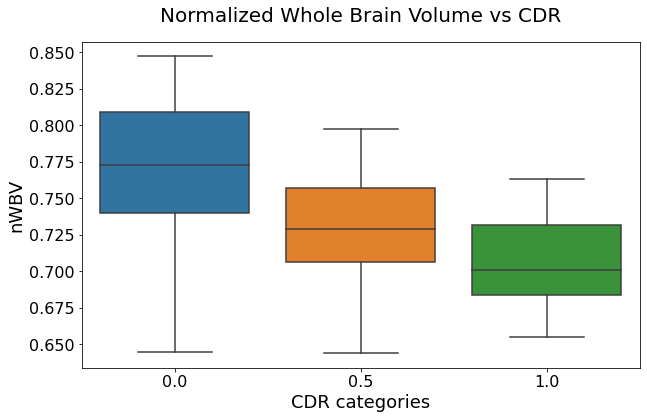

In [23]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="CDR", y="nWBV", data=data)
plt.title('Normalized Whole Brain Volume vs CDR',pad =20,size=20)
plt.xlabel('CDR categories', size=18)
plt.xticks(fontsize=16)
plt.ylabel('nWBV', size=18)
plt.yticks(fontsize=16)
plt.savefig('nWBV_CDR.png', dpi=300)

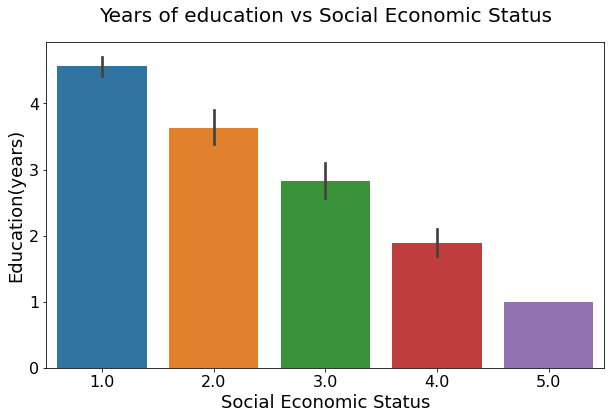

In [24]:
# plot SES vs Years of education
plt.figure(figsize=(10,6))
sns.barplot(x="SES", y="Educ",data=data)
plt.title('Years of education vs Social Economic Status',pad =20,size=20)
plt.xlabel('Social Economic Status', size=18)
plt.xticks(fontsize=16)
plt.ylabel('Education(years)', size=18)
plt.yticks(fontsize=16)
plt.savefig('Educ_SES.png', dpi=300)

In [ ]:
# SES is a categorical feature.We will fill in missing values with the mode.
#data['SES'] = data['SES'].fillna(2.0)

In [ ]:
#data.isna().sum().sum()

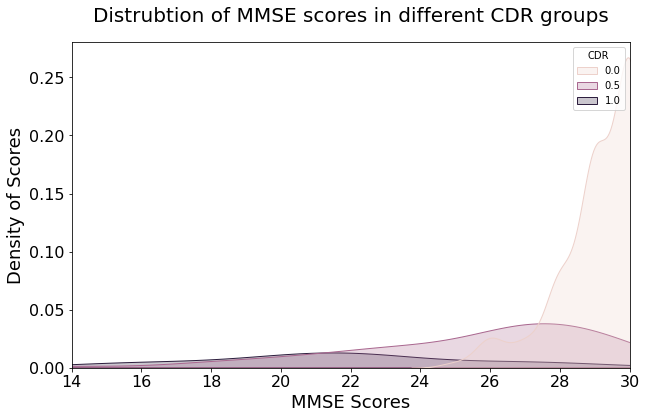

In [25]:
#Relationship between MMSE and Dementia
plt.figure(figsize=(10,6))
sns.kdeplot(x='MMSE', shade=True, hue='CDR',data=data)
plt.title('Distrubtion of MMSE scores in different CDR groups',pad =20,size=20)
plt.xlim(data['MMSE'].min(), data['MMSE'].max())
plt.xlabel('MMSE Scores', size=18)
plt.xticks(fontsize=16)
plt.ylabel('Density of Scores', size=18)
plt.yticks(fontsize=16)
plt.savefig('MMSE_CDR.png', dpi=300)

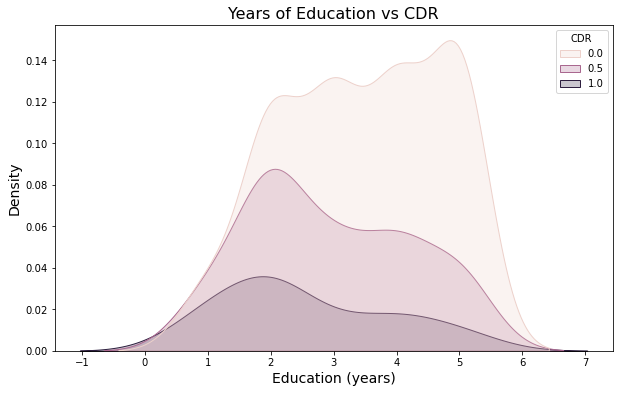

In [26]:
#Relationship Between Education Years and Dementia
plt.figure(figsize=(10,6))
sns.kdeplot(x='Educ', shade=True, hue='CDR', data=data)
plt.title('Years of Education vs CDR', size=16)
plt.xlabel('Education (years)', size=14)
plt.ylabel('Density', size=14)
plt.show()

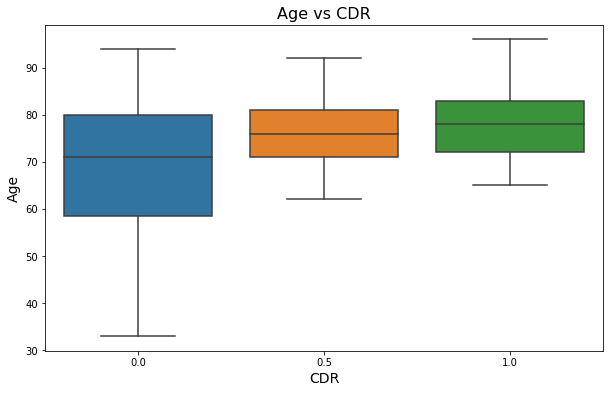

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x="CDR", y="Age", data=data)
plt.title('Age vs CDR', size=16)
plt.xlabel('CDR', size=14)
plt.ylabel('Age', size=14)
plt.show()

In [28]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [130]:
#split data into X and y
y = data['CDR']
X = data.drop(['CDR'], axis=1)

In [131]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [132]:
print(type(y))
print(type(X))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [133]:
y = pd.DataFrame(y,columns = ['CDR'])

In [134]:
X['SES'] = X.SES.astype('category')
X['Gender']=X.Gender.astype('category')

In [135]:
random_state = 42
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
print('**balance with stratification:**')
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

**balance with stratification:**
CDR
0      0.575540
1      0.302158
2      0.122302
dtype: float64
CDR
0      0.574468
1      0.297872
2      0.127660
dtype: float64
CDR
0      0.595745
1      0.297872
2      0.106383
dtype: float64


In [84]:
random_state = 42
# Given the imbalanced classes in our data, 
# we will first split the data based on the distribution of our target variable  
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
#print('test balance:',y_test.value_counts(normalize=True))

In [148]:


print('Train set:', X_train.shape, y_train.shape)
print('Val set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (139, 8) (139, 1)
Val set: (47, 8) (47, 1)
Test set: (47, 8) (47, 1)


In [86]:
# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('train balance:')
    print(y_train.value_counts(normalize=True))
    print('val balance:')
    print(y_val.value_counts(normalize=True))

train balance:
CDR
0      0.587838
1      0.297297
2      0.114865
dtype: float64
val balance:
CDR
0      0.552632
1      0.315789
2      0.131579
dtype: float64
train balance:
CDR
0      0.583893
1      0.302013
2      0.114094
dtype: float64
val balance:
CDR
0      0.567568
1      0.297297
2      0.135135
dtype: float64
train balance:
CDR
0      0.577181
1      0.302013
2      0.120805
dtype: float64
val balance:
CDR
0      0.594595
1      0.297297
2      0.108108
dtype: float64
train balance:
CDR
0      0.577181
1      0.302013
2      0.120805
dtype: float64
val balance:
CDR
0      0.594595
1      0.297297
2      0.108108
dtype: float64
train balance:
CDR
0      0.577181
1      0.302013
2      0.120805
dtype: float64
val balance:
CDR
0      0.594595
1      0.297297
2      0.108108
dtype: float64


In [137]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [138]:
std_ftrs = ['Age','Educ','MMSE','eTIV','nWBV','ASF']
scaler = StandardScaler()
print(scaler.fit_transform(X_train[std_ftrs]))
print(scaler.transform(X_val[std_ftrs]))
print(scaler.transform(X_test[std_ftrs]))

[[ 7.68459338e-02  1.37346053e+00  8.12310771e-01  2.02260808e+00
   1.83009175e-01 -1.82148101e+00]
 [ 4.10645459e-01  6.09816474e-01  1.94332720e-03 -4.62928943e-01
  -1.13680093e+00  3.96610120e-01]
 [-2.17630086e+00  6.09816474e-01  8.12310771e-01 -7.45786666e-01
   1.77955366e+00  7.35485154e-01]
 [-2.56953591e-01 -9.17471632e-01  5.42188290e-01 -1.12493638e+00
   9.70637785e-01  1.22839429e+00]
 [ 4.10645459e-01  1.37346053e+00  8.12310771e-01 -1.36566636e+00
   3.39983573e-02  1.56726933e+00]
 [-6.60394743e-03 -9.17471632e-01 -2.15903652e+00 -1.17910063e+00
  -8.57616219e-03  1.29770964e+00]
 [ 4.94095340e-01  6.09816474e-01  5.42188290e-01  5.66191712e-01
  -2.42736019e-01 -6.66225214e-01]
 [-1.09145240e+00  1.37346053e+00  8.12310771e-01 -4.08764698e-01
   1.65183010e+00  3.34996478e-01]
 [-1.73503710e-01  1.37346053e+00  8.12310771e-01  1.79993285e+00
  -6.25906694e-01 -1.66744691e+00]
 [ 1.60295815e-01 -9.17471632e-01  2.72065808e-01  2.47224491e-01
   7.65728767e-02 -3.5815

In [139]:
onehot_ftrs = ['Gender']
# initialize the encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array
# fit the training data
enc.fit(X_train[onehot_ftrs])
print('feature names:',enc.get_feature_names(onehot_ftrs))
print(len(enc.get_feature_names(onehot_ftrs)))
    
# transform X_train
onehot_train = enc.transform(X_train[onehot_ftrs])
print('transformed train features:')
#print(onehot_train)
# transform X_val
onehot_val = enc.transform(X_val[onehot_ftrs])
print('transformed val features:')
#print(onehot_val)
# transform X_test
onehot_test = enc.transform(X_test[onehot_ftrs])
print('transformed test features:')
#print(onehot_test)


feature names: ['Gender_0' 'Gender_1']
2
transformed train features:
transformed val features:
transformed test features:


In [140]:
ordinal_ftrs = ['SES']
ordinal_cats = [['1','2','3','4','5']]
enc = OrdinalEncoder(categories = ordinal_cats)

In [141]:
enc.fit(X_train[ordinal_ftrs]) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# transform X_train. We could use enc.fit_transform(X_train) to combine fit and transform
ordinal_train = enc.transform(X_train[ordinal_ftrs])
print('transformed train features:')
print(ordinal_train)
# transform X_val
ordinal_val = enc.transform(X_val[ordinal_ftrs])
print('transformed validation features:')
print(ordinal_val)
# transform X_test
ordinal_test = enc.transform(X_test[ordinal_ftrs])
print('transformed test features:')
print(ordinal_test)

In [149]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X_train_impute= imputer.fit_transform(X_train[ordinal_ftrs])
print(X_train_impute)
#X_train_imp = pd.DataFrame(data=X_train_impute, columns = X_train.columns)
#imputer.fit_transform(X_train[ordinal_ftrs])

[[2.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [4.]
 [4.]
 [3.]
 [1.]
 [2.]
 [2.]
 [4.]
 [1.]
 [4.]
 [1.]
 [2.]
 [4.]
 [3.]
 [1.]
 [1.]
 [1.]
 [4.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [4.]
 [2.]
 [2.]
 [4.]
 [3.]
 [3.]
 [4.]
 [3.]
 [1.]
 [1.]
 [1.]
 [3.]
 [2.]
 [2.]
 [1.]
 [3.]
 [1.]
 [3.]
 [4.]
 [3.]
 [1.]
 [3.]
 [1.]
 [2.]
 [4.]
 [4.]
 [1.]
 [2.]
 [1.]
 [4.]
 [2.]
 [2.]
 [1.]
 [3.]
 [3.]
 [2.]
 [2.]
 [1.]
 [4.]
 [5.]
 [2.]
 [4.]
 [1.]
 [3.]
 [4.]
 [1.]
 [1.]
 [3.]
 [3.]
 [1.]
 [1.]
 [3.]
 [4.]
 [2.]
 [3.]
 [4.]
 [1.]
 [1.]
 [2.]
 [5.]
 [1.]
 [3.]
 [1.]
 [2.]
 [1.]
 [4.]
 [2.]
 [4.]
 [2.]
 [3.]
 [1.]
 [4.]
 [3.]
 [3.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [1.]
 [4.]
 [4.]
 [1.]
 [4.]
 [3.]
 [4.]
 [4.]
 [3.]
 [4.]
 [2.]
 [4.]
 [1.]
 [1.]
 [4.]
 [3.]
 [4.]
 [2.]
 [2.]
 [2.]]


In [143]:

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
# We need to replace the NaN with a string first!
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [146]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# little hacky, but collect feature names
feature_names = preprocessor.transformers_[0][-1] + \
                list(preprocessor.named_transformers_['cat'][1].get_feature_names(cat_ftrs)) + \
                preprocessor.transformers_[2][-1]

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = preprocessor.transform(X_Val)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

IndexError: list index out of range

In [ ]:
    from sklearn.preprocessing import OrdinalEncoder
    #preprocessing ordinary feature
    ordinal_ftrs = ['SES']
    ordinal_cats = [['1','2','3','4','5']]
    imputer = SimpleImputer(strategy='constant',fill_value='NA')
    enc = OrdinalEncoder(categories = ordinal_cats) # The ordered list of 
# categories need to be provided. By default, the categories are alphabetically ordered!

# fit the training data
enc.fit(Xtoy_train)
# print the categories - not really important because we manually gave the ordered list of categories
print(enc.categories_)
# transform X_train. We could have used enc.fit_transform(X_train) to combine fit and transform
X_train_oe = enc.transform(Xtoy_train)
print(X_train_oe)
# transform X_test
X_test_oe = enc.transform(Xtoy_test) # OrdinalEncoder always throws an error message if 
    
    
    
imputer.fit(data[['SES']])
data[['SES']] = imputer.fit_transform(data[['SES']])
    
>>> enc = OrdinalEncoder()
>>> X = [['Male', 1], ['Female', 3], ['Female', 2]]
>>> enc.fit(X)
OrdinalEncoder()
>>> enc.categories_
[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
>>> enc.transform([['Female', 3], ['Male', 1]])
array([[0., 2.],
       [1., 0.]])
    

In [ ]:
    # preprocessing categorical features
    cat_ftrs = ['Gender']
    # initialize the encoder
    enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array
    # fit the training data
    enc.fit(X_train[onehot_ftrs])
    print('feature names:',enc.get_feature_names(onehot_ftrs))
    print(len(enc.get_feature_names(onehot_ftrs)))
    
    # transform X_train
    onehot_train = enc.transform(X_train[onehot_ftrs])
    print('transformed train features:')
    #print(onehot_train)
    # transform X_val
    onehot_val = enc.transform(X_val[onehot_ftrs])
    print('transformed val features:')
    #print(onehot_val)
    # transform X_test
    onehot_test = enc.transform(X_test[onehot_ftrs])
    print('transformed test features:')
    #print(onehot_test)
    